In [32]:
import numpy as np
import pandas as pd
import os
import sys
import re
import nltk
import string
from dotenv import load_dotenv
from lyricsgenius import Genius
from tqdm.auto import tqdm
load_dotenv()
genius_token = os.getenv('GENIUS_ACCESS_TOKEN')
genius = Genius(genius_token)
import json
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [22]:
# load pickle file
artists_dict = pd.read_pickle('../dict_featuresALL-modified.pickle')

FileNotFoundError: [Errno 2] No such file or directory: '../dict_featuresALL-modified.pickle'

In [33]:
df = pd.read_csv('../nodes.csv')

In [34]:
artist_list = df.iloc[:,1].to_numpy()
artist_list

array(['Post Malone', 'Roddy Ricch', 'Doja Cat', ..., 'Jarryd James',
       'Rebel Wilson', 'Purity Ring'], dtype=object)

In [69]:
genius_artist = genius.search_artist('Eminem', max_songs=3, sort="popularity", allow_name_change=True)



Searching for songs by Eminem...

Song 1: "Rap God"
Song 2: "Killshot"
Song 3: "Lose Yourself"

Reached user-specified song limit (3).
Done. Found 3 songs.


In [70]:
genius_artist.save_lyrics()

Wrote Lyrics_Eminem.json.


In [98]:
from pathlib import Path

In [99]:
files = os.listdir()
done_list = artist_list
files = [Path(f).stem for f in files if f.endswith('.json')]
remaining = np.setdiff1d(done_list, files)

In [100]:
files

['Marc E. Bassy',
 'MisterWives',
 'YBN Nahmir',
 'Jeremy Zucker',
 'Jessica Darrow',
 'mazie',
 'ZHU',
 'Dynoro',
 'Disturbed',
 'Jonathan Groff',
 'Stan Kenton',
 'Fat Joe',
 'Ruth B.',
 'Timeflies',
 'Jessie J',
 'G Herbo',
 'Grimes',
 'The Beach Boys',
 'Ryn Weaver',
 'Summer Walker',
 'Oscar Maydon  Natanael Cano',
 'Grupo Frontera',
 'Southside',
 'ILOVEMAKONNEN',
 'LÃON',
 'Tame Impala',
 'NextYoungin',
 'The Kid LAROI',
 'John Mayer',
 'Surf Mesa',
 'Mother Mother',
 'GEazy',
 'James Blake',
 'mxmy',
 'Quavo',
 'NAV',
 'Charlie Puth',
 'PSY',
 'Alok',
 'Wiz Khalifa',
 'TOMORROW X TOGETHER',
 'Surfaces',
 'Shawn Hook',
 'Gayla Peevey',
 'Eric Clapton',
 'Kanye West',
 'Rainbow Kitten Surprise',
 'TLC',
 'Ingrid Andress',
 'Lainey Wilson',
 'SHIN JIMIN',
 'Dante Klein',
 'CAZZETTE',
 'Kid Cudi',
 'Myke Towers',
 'J.I the Prince of N.Y',
 'Roar',
 'Saweetie',
 'Jung Kook',
 'Cash Cash',
 'Gerry Rafferty',
 'Ingrid Michaelson',
 'Fall Out Boy',
 'Amy Grant',
 'Death Cab for Cutie',

In [63]:
print(files)

['Marc E', 'MisterWives', 'YBN Nahmir', 'Jeremy Zucker', 'Jessica Darrow', 'mazie', 'ZHU', 'Dynoro', 'Disturbed', 'Jonathan Groff', 'Stan Kenton', 'Fat Joe', 'Ruth B', 'Timeflies', 'Jessie J', 'G Herbo', 'Grimes', 'The Beach Boys', 'Ryn Weaver', 'Summer Walker', 'Oscar Maydon  Natanael Cano', 'Grupo Frontera', 'Southside', 'ILOVEMAKONNEN', 'LÃON', 'Tame Impala', 'NextYoungin', 'The Kid LAROI', 'John Mayer', 'Surf Mesa', 'Mother Mother', 'GEazy', 'James Blake', 'mxmy', 'Quavo', 'NAV', 'Charlie Puth', 'PSY', 'Alok', 'Wiz Khalifa', 'TOMORROW X TOGETHER', 'Surfaces', 'Shawn Hook', 'Gayla Peevey', 'Eric Clapton', 'Kanye West', 'Rainbow Kitten Surprise', 'TLC', 'Ingrid Andress', 'Lainey Wilson', 'SHIN JIMIN', 'Dante Klein', 'CAZZETTE', 'Kid Cudi', 'Myke Towers', 'J', 'Roar', 'Saweetie', 'Jung Kook', 'Cash Cash', 'Gerry Rafferty', 'Ingrid Michaelson', 'Fall Out Boy', 'Amy Grant', 'Death Cab for Cutie', 'Dreamville', 'Clinton Kane', 'RM', 'Rachel Platten', 'BENEE', 'Miguel', 'Billie Eilish', '

In [130]:
remaining

['Belly',
 'Bing Crosby',
 'Britney Spears',
 'Carly Rae Jepsen',
 'Dan + Shay',
 'Diddy',
 'Dr. Dre',
 'Elton John',
 'Elvis Presley',
 'Florence + The Machine',
 'John Lennon',
 'Judy Garland',
 'Lil Nas X',
 'Lilly Wood and The Prick',
 'Lynyrd Skynyrd',
 'Marvin Gaye',
 'Nirvana',
 'Paul McCartney',
 'Pharrell Williams',
 'Snoop Dogg',
 'TOKYOâ\x80\x99S REVENGE',
 'The Jackson 5',
 'The Notorious B.I.G.',
 'The Temptations',
 'Tyler, The Creator',
 'Young Money']

In [128]:
remaining = [x.strip() for x in remaining if "!" not in x]

In [137]:
remaining[21:]

['The Jackson 5',
 'The Notorious B.I.G.',
 'The Temptations',
 'Tyler, The Creator',
 'Young Money']

In [138]:
def get_artist(artist):
    while True:
        try:
            genius_artist = genius.search_artist(artist, max_songs=3, sort="popularity", allow_name_change=True)
            
            if genius_artist is not None:
                break
        except Exception as e:
            print(e)
    try:
        genius_artist.save_lyrics(f'{artist}', verbose=False, overwrite=True, ensure_ascii=True)

    except Exception as e:
        print(e)
        
for artist in remaining[21:]:
    get_artist(artist) 

Searching for songs by The Jackson 5...

Song 1: "I Want You Back"
Song 2: "ABC"
Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Searching for songs by The Jackson 5...

Song 1: "I Want You Back"
Song 2: "ABC"
Song 3: "I’ll Be There"

Reached user-specified song limit (3).
Done. Found 3 songs.
Searching for songs by The Notorious B.I.G....

Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Searching for songs by The Notorious B.I.G....

Song 1: "Juicy"
Song 2: "Big Poppa"
Song 3: "Suicidal Thoughts"

Reached user-specified song limit (3).
Done. Found 3 songs.
Searching for songs by The Temptations...

Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)
Searching for songs by The Temptations...

Song 1: "My Girl"
Song 2: "Papa Was a Rollin’ Stone"
Song 3: "Silent Night"

Reached user-specified song limit (3).
Done. Found 3 songs.
Sea

In [5]:
files = [f for f in os.listdir() if f.endswith('.json')]
len(files)

1123

In [6]:
def get_song_lyrics(artist_json):
    artist = json.load(open(artist_json))
    artist_name = artist['name']
    lyrics = []
    for song in artist['songs']:
        lyrics.append(song['lyrics'])
    return artist_name, lyrics

In [7]:
names_all, lyrics_all = [], []
for f in files:
    artist_name, lyrics = get_song_lyrics(f)
    names_all.append(artist_name)
    lyrics_all.append(lyrics)

In [17]:
df1 = pd.DataFrame(zip(names_all, lyrics_all), columns=['artist', 'lyrics'])

In [18]:
df1['len_lyrics'] = df1.lyrics.apply(lambda x: len(x))
filt = df1['len_lyrics'] != 0
df1 = df1[filt]
print(df1.shape)
df1.head()

(1114, 3)


,artist,lyrics,len_lyrics
0,Marc E. Bassy,[33 ContributorsYou & Me Lyrics[Verse 1: Marc ...,3
1,MisterWives,[20 ContributorsReflections Lyrics[Verse 1]\nY...,3
2,YBN Nahmir,[185 ContributorsRubbin off the Paint Lyrics[I...,3
3,Jeremy Zucker,[41 ContributorsTranslationsEspañol​comethru L...,3
4,Jessica Darrow,[110 ContributorsTranslationsTagalog / ᜆᜄᜎᜓᜄ᜔S...,3


In [10]:
print(df1.lyrics[0][0].strip().split('Lyrics[')[1].replace('\n', ' '))

Verse 1: Marc E. Bassy] Girl you party all the time Don't let me stay on your mind Adderall and cheap wine Just to stay awake in conversation We were always so damn insecure So how could we ever know for sure And disregard the way I know we feel That would make this city way too real  [Chorus: Marc E. Bassy] If we bump into each other On a crowded street It’s not us no more It’s just you and me We’re just strangers in passing casually It’s not us no more It’s just you and me  [Verse 2: Marc E. Bassy] The shirt on my back with the rips Gems in my golden necklace You didn't give me none of this There's nothing for me to miss We were too young on the day we met How could we say we would not forget And in the shadows there's a place for us Somewhere hidden they can't find our love Don't let 'em know You might also like[Chorus: Marc E. Bassy] If we bump into each other On a crowded street It’s not us no more It’s just you and me We’re just strangers in passing casually It’s not us no more I

In [19]:
df1['processed'] = df1['lyrics'].apply(lambda x : ' '.join(x))
df1['processed'] = df1['processed'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x).replace('\n', ' ').split(' Lyrics'))

In [20]:
df1

,artist,lyrics,len_lyrics,processed
0,Marc E. Bassy,[33 ContributorsYou & Me Lyrics[Verse 1: Marc ...,3,"[33 ContributorsYou & Me, Girl you party all ..."
1,MisterWives,[20 ContributorsReflections Lyrics[Verse 1]\nY...,3,"[20 ContributorsReflections, You didn't close..."
2,YBN Nahmir,[185 ContributorsRubbin off the Paint Lyrics[I...,3,"[185 ContributorsRubbin off the Paint, That's..."
3,Jeremy Zucker,[41 ContributorsTranslationsEspañol​comethru L...,3,"[41 ContributorsTranslationsEspañol​comethru, ..."
4,Jessica Darrow,[110 ContributorsTranslationsTagalog / ᜆᜄᜎᜓᜄ᜔S...,3,[110 ContributorsTranslationsTagalog / ᜆᜄᜎᜓᜄ᜔S...
...,...,...,...,...
1118,Kristen Bell,[31 ContributorsThe Next Right Thing Lyrics[Ve...,3,"[31 ContributorsThe Next Right Thing, I've se..."
1119,StaySolidRocky,[59 ContributorsParty Girl Lyrics[Intro]\nGirl...,3,"[59 ContributorsParty Girl, Girls just wanna ..."
1120,Quality Control & Migos,[128 ContributorsToo Hotty Lyrics[Intro: Offse...,3,"[128 ContributorsToo Hotty, Woo! Yah! Whew! ..."
1121,Polo G,[170 ContributorsTranslationsTürkçeEspañolРусс...,3,[170 ContributorsTranslationsTürkçeEspañolРусс...


In [12]:
df1['len_processed'] = df1['processed'].apply(lambda x: len(x))

In [13]:
df1 = df1.drop([408,452,651])

In [14]:
df1[df1['len_processed'] < 2]

,artist,lyrics,len_lyrics,processed,len_processed


In [15]:
df1['processed'] = df1['processed'].apply(lambda x: x[1])

In [16]:
df1

,artist,lyrics,len_lyrics,processed,len_processed
0,Marc E. Bassy,[33 ContributorsYou & Me Lyrics[Verse 1: Marc ...,3,Girl you party all the time Don't let me stay...,4
1,MisterWives,[20 ContributorsReflections Lyrics[Verse 1]\nY...,3,"You didn't close the door Left a crack open, ...",4
2,YBN Nahmir,[185 ContributorsRubbin off the Paint Lyrics[I...,3,That's what I thought you said Now let me off...,4
3,Jeremy Zucker,[41 ContributorsTranslationsEspañol​comethru L...,3,I might lose my mind Waking when the sun's do...,4
4,Jessica Darrow,[110 ContributorsTranslationsTagalog / ᜆᜄᜎᜓᜄ᜔S...,3,"I'm the strong one, I'm not nervous I'm as to...",4
...,...,...,...,...,...
1118,Kristen Bell,[31 ContributorsThe Next Right Thing Lyrics[Ve...,3,"I've seen dark before, but not like this This...",4
1119,StaySolidRocky,[59 ContributorsParty Girl Lyrics[Intro]\nGirl...,3,"Girls just wanna have fun So they party, so t...",4
1120,Quality Control & Migos,[128 ContributorsToo Hotty Lyrics[Intro: Offse...,3,"Woo! Yah! Whew! Father God, Father God I j...",4
1121,Polo G,[170 ContributorsTranslationsTürkçeEspañolРусс...,3,"Uh , copped a BMW, new deposit, I picked u...",4


In [160]:
df2 = df1[['artist', 'processed']]
genres = pd.read_pickle('../dict_genresPreProcessed.pickle')
genres2 = {}
for k, v in genres.items():
    name = k[0]
    genres2[name] = v['top genre']

l1 = [artist for artist in df2.artist if artist not in genres2.keys()]

df2['genre'] = df2['artist'].apply(lambda x: genres2[x] if x in genres2.keys() else None)
df2.dropna(inplace=True)
df2

/tmp/ipykernel_6166/3079943749.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['genre'] = df2['artist'].apply(lambda x: genres2[x] if x in genres2.keys() else None)
/tmp/ipykernel_6166/3079943749.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


,artist,processed,genre
0,Marc E. Bassy,Girl you party all the time Don't let me stay...,rap
1,MisterWives,"You didn't close the door Left a crack open, ...",indie
2,YBN Nahmir,That's what I thought you said Now let me off...,trap
3,Jeremy Zucker,I might lose my mind Waking when the sun's do...,alt-zentative
4,Jessica Darrow,"I'm the strong one, I'm not nervous I'm as to...",movie
...,...,...,...
1117,Rascal Flatts,"Woo Hmm, yeah Life's like a road that you t...",country
1118,Kristen Bell,"I've seen dark before, but not like this This...",movie
1119,StaySolidRocky,"Girls just wanna have fun So they party, so t...",rap
1121,Polo G,"Uh , copped a BMW, new deposit, I picked u...",rap


In [162]:
def tokenizer(input_text):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    manual_stop_words = set(['uh', 'oh'])
    stop_words = list(stop_words.union(manual_stop_words))
    stop_words = [re.sub('[^a-z_-]', ' ', stop_word) for stop_word in stop_words]
    input_text = input_text.lower()
    input_text = re.sub('[^a-z_-]', ' ', input_text)
    tokens = nltk.tokenize.word_tokenize(input_text)
    tokens = [token for token in tokens if token not in stop_words and len(token) > 1 and ('-' or ' - ') not in token]

    return tokens

df2['tokens'] = df2['processed'].apply(lambda x: tokenizer(x))
df2

/tmp/ipykernel_6166/3272884124.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tokens'] = df2['processed'].apply(lambda x: tokenizer(x))


,artist,processed,genre,tokens
0,Marc E. Bassy,Girl you party all the time Don't let me stay...,rap,"[girl, party, time, let, stay, mind, adderall,..."
1,MisterWives,"You didn't close the door Left a crack open, ...",indie,"[close, door, left, crack, open, ignore, faint..."
2,YBN Nahmir,That's what I thought you said Now let me off...,trap,"[thought, said, let, offer, rebuttal, ayy, ayy..."
3,Jeremy Zucker,I might lose my mind Waking when the sun's do...,alt-zentative,"[might, lose, mind, waking, sun, riding, highs..."
4,Jessica Darrow,"I'm the strong one, I'm not nervous I'm as to...",movie,"[strong, one, nervous, tough, crust, earth, mo..."
...,...,...,...,...
1117,Rascal Flatts,"Woo Hmm, yeah Life's like a road that you t...",country,"[woo, hmm, yeah, life, like, road, travel, one..."
1118,Kristen Bell,"I've seen dark before, but not like this This...",movie,"[seen, dark, like, cold, empty, numb, life, kn..."
1119,StaySolidRocky,"Girls just wanna have fun So they party, so t...",rap,"[girls, wan, na, fun, party, party, lil, mama,..."
1121,Polo G,"Uh , copped a BMW, new deposit, I picked u...",rap,"[copped, bmw, new, deposit, picked, another, b..."


In [163]:
tok_genre = df2.groupby('genre').apply(lambda x: x['tokens'].sum())
specific_genres = ['pop', 'rap', 'hip-hop', 'rock', 'country', 'indie', 'trap', 'r&b']
tok_genre = tok_genre[specific_genres]
tokens_dict = {k: v for k,v in tok_genre.items()}
[print(key, len(tokens_dict[key])) for key in tokens_dict.keys()]

pop 41513
rap 36239
hip-hop 29596
rock 10342
country 11621
indie 5255
trap 9601
r&b 5931


[None, None, None, None, None, None, None, None]

In [164]:
def TermFrequency(tokens):
    tf_dict = {}
    for token in tokens:
        if token in tf_dict:
            tf_dict[token] += 1
        else:
            tf_dict[token] = 1
    return tf_dict

def idf(tf_dict):
    idf_dict = {}
    N = len(tf_dict)
    all_tokens = set([token for tokens in tf_dict.values() for token in tokens])

    for token in all_tokens:
        n = 0
        for tokens in tf_dict.values():
            if token in tokens:
                n += 1
        idf_dict[token] = np.log(N / n)

    return idf_dict

def tf_idf(tf_dict, idf_dict):
    tf_idf_dict = {}

    for community, tokens in tf_dict.items():
        tf_idf_dict[community] = {}
        for token in tokens:
            tf_idf_dict[community][token] = tokens[token] * idf_dict[token]

    return tf_idf_dict

In [165]:
genres_tf = {}
for genre in tokens_dict.keys():
    genres_tf[genre] = TermFrequency(tokens_dict[genre])
    sort5 = sorted(genres_tf[genre].items(), reverse=True, key=lambda x: x[1])
    print(f'Community {genre} has top 5 words: {sort5[:5]}')

Community pop has top 5 words: [('like', 949), ('love', 765), ('know', 622), ('na', 599), ('got', 546)]
Community rap has top 5 words: [('like', 811), ('got', 666), ('yeah', 538), ('know', 495), ('nigga', 415)]
Community hip-hop has top 5 words: [('like', 721), ('got', 437), ('yeah', 376), ('get', 355), ('nigga', 295)]
Community rock has top 5 words: [('like', 194), ('go', 123), ('know', 99), ('back', 92), ('never', 88)]
Community country has top 5 words: [('na', 238), ('like', 224), ('know', 165), ('love', 139), ('girl', 131)]
Community indie has top 5 words: [('low', 175), ('like', 137), ('got', 68), ('know', 62), ('night', 46)]
Community trap has top 5 words: [('like', 267), ('got', 188), ('nigga', 174), ('bitch', 169), ('yeah', 124)]
Community r&b has top 5 words: [('got', 130), ('like', 122), ('yeah', 103), ('love', 87), ('know', 85)]


In [166]:
genres_idf = idf(tokens_dict)

In [167]:
print(sorted(genres_idf.items(), reverse=True, key=lambda x: x[1])[:5])

[('flockin', 2.0794415416798357), ('neighborhoods', 2.0794415416798357), ('aiswhataya', 2.0794415416798357), ('reverb', 2.0794415416798357), ('bruce', 2.0794415416798357)]


In [168]:
genres_tf_idf = tf_idf(genres_tf, genres_idf)

In [169]:
for genres in genres_tf_idf.keys():
    sort5 = sorted(genres_tf_idf[genres].items(), reverse=True, key=lambda x: x[1])
    print(f'{genres} has top 5 words: {sort5[:5]}')

pop has top 5 words: [('que', 97.10209604816089), ('ti', 87.3365447505531), ('quiero', 81.79136730607354), ('ena', 79.01877858383376), ('tu', 67.92842369487464)]
rap has top 5 words: [('nigga', 195.0515061369803), ('niggas', 87.45535002534137), ('dunno', 66.54212933375474), ('forward', 57.86892592769185), ('bitch', 46.068330455460284)]
hip-hop has top 5 words: [('nigga', 138.651070627492), ('pedal', 70.70101241711441), ('niggas', 60.41323521487398), ('raf', 49.906597000316054), ('isis', 41.58883083359672)]
rock has top 5 words: [('believer', 37.42994775023704), ('californication', 35.350506208557206), ('sha', 33.27106466687737), ('sail', 29.112181583517703), ('trojan', 29.1121815835177)]
country has top 5 words: [('withdrawals', 29.1121815835177), ('misunderstood', 27.725887222397812), ('cheats', 24.953298500158027), ('tacoma', 22.873856958478193), ('whiskey', 21.487562597358306)]
indie has top 5 words: [('dun', 27.725887222397812), ('khalifa', 27.032740041837865), ('weapon', 16.674097

pop


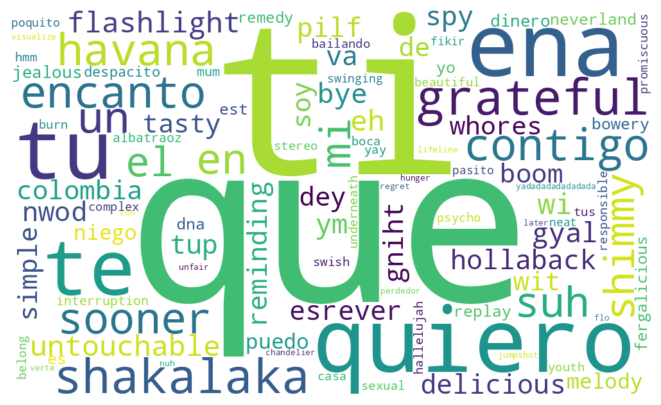

rap


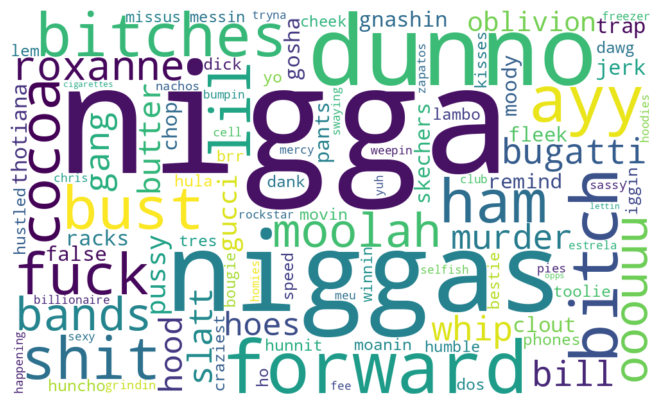

hip-hop


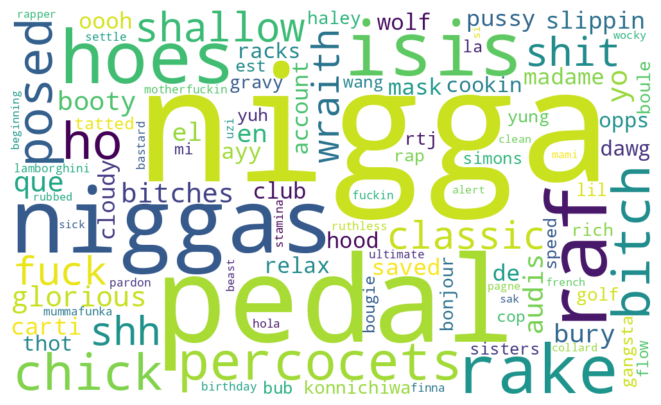

rock


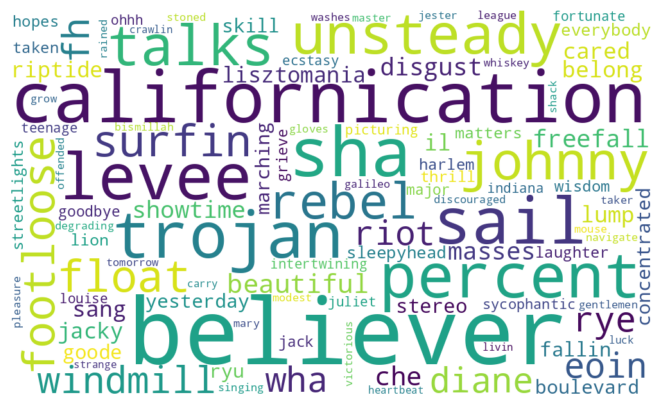

country


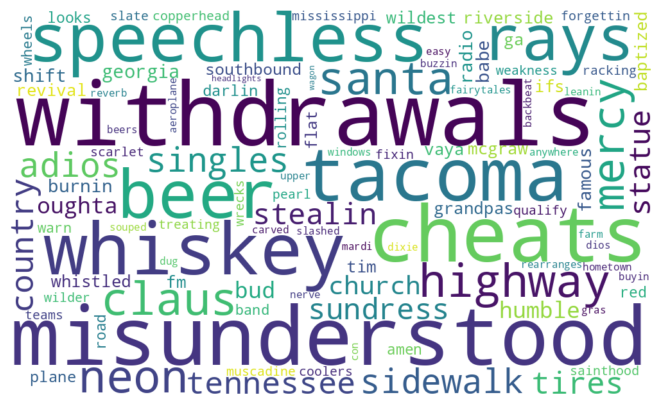

indie


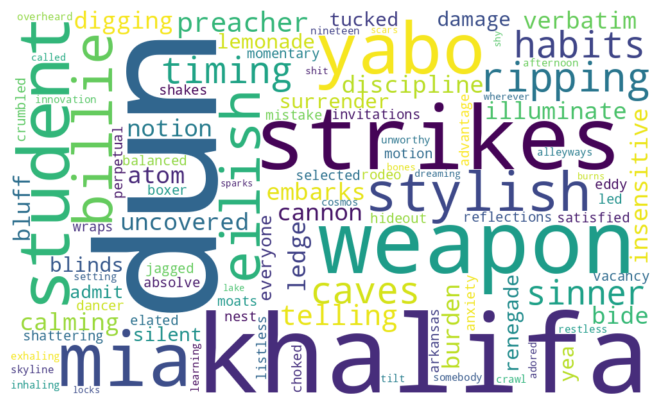

trap


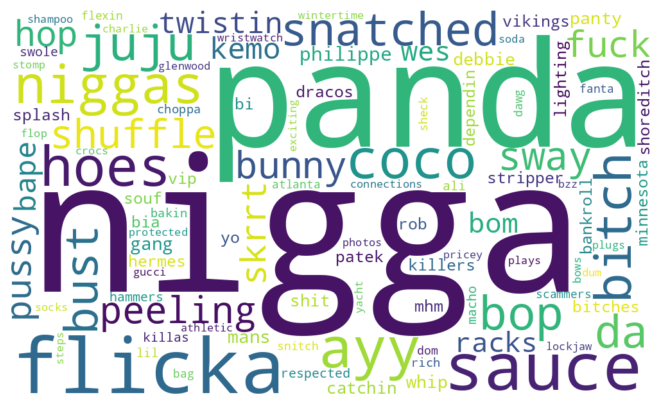

r&b


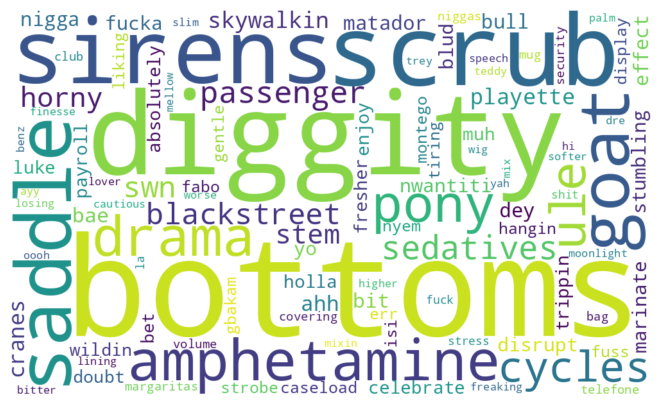

In [170]:
for genre in genres_tf_idf.keys():
    print(genre)
    wordcloud = WordCloud(background_color="white", max_words=100, width=1000, height=600).generate_from_frequencies(genres_tf_idf[genre])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()